# KMeans

In [1]:
import numpy
import matplotlib.pyplot as plt
from random import randint
from math import sqrt, pow
%matplotlib inline

Antes de tudo, criaremos dados para testar as funções abaixo conforme a implementação vai acontecendo.

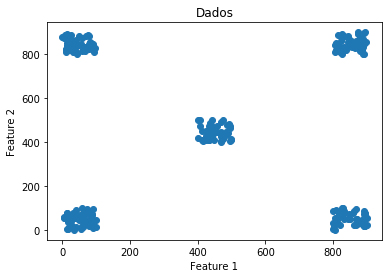

In [2]:
# x será o vetor com os dados
x = []

for i in range(0, 50):
    x.append([randint(0, 100), randint(0, 100)])
    
for i in range(0, 50):
    x.append([randint(400, 500), randint(400, 500)])
    
for i in range(0, 50):
    x.append([randint(800, 900), randint(800, 900)])
    
for i in range(0, 50):
    x.append([randint(0, 100), randint(800, 900)])
    
for i in range(0, 50):
    x.append([randint(800, 900), randint(0, 100)])

# x deve ser um array numpy
x = numpy.array(x)

# Plotando
plt.figure()
plt.scatter(x=x[:, 0], y=x[:, 1], cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dados')
plt.show()

Também criaremos funções para plotar os dados conforme iremos testando as funções.

In [3]:
def printar(x, y):
    plt.figure()
    plt.scatter(x=x[:, 0], y=x[:, 1], c=y, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Training Set Clusters')
    plt.show()

In [4]:
def printarComCentroides(x, y, centroides):
    plt.figure()
    plt.scatter(x=x[:, 0], y=x[:, 1], c=y, cmap='viridis')
    plt.scatter(x=centroides[:,0], y=centroides[:,1], c='r', marker='X')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Training Set Clusters')    
    plt.show()

## Função gerarCentroidesAleatorios

O KMeans começa definindo k centróides aleatórios para os k clusters. A função abaixo escolhe aleatoriamente k pontos para serem os centroides.

In [5]:
def gerarCentroidesAleatorios(data, k):
    #A primeira coisa a fazer é descobrir quantos dados há
    qtdDados = data.shape[0]
    
    #Preciso de k centroides. Esses centroides serao pontos aleatórios de data
    vetorCentroides = []
    
    # O for vai gerar os k centróides.
    for i in range(0, k):
        
        # Escolhendo um ponto aleatoriamente para ser um novo centroide
        novoCentroide = data[randint(0, qtdDados - 1)]
        
        # Enquanto o centróide for repetido, eu seleciono outro ponto para ser o novoCentroide
        while any(numpy.array_equal(novoCentroide, centroideAtual) for centroideAtual in vetorCentroides):
            novoCentroide = data[randint(0, qtdDados - 1)]                
            
        # Agora que já tenho um ponto para ser um centroide, irei adicioná-lo ao vetorCentroides
        vetorCentroides.append(novoCentroide)                      
    
    # Com o vetorCentroides pronto, posso tranformá-lo num array numpy e retorná-lo
    vetorCentroides = numpy.array(vetorCentroides)        
    
    return vetorCentroides

### Testando a função

In [6]:
#Gerando 3, 5 e 10 centróides aleatoriamente
vetorCentroides3 = gerarCentroidesAleatorios(x, 3)
vetorCentroides5 = gerarCentroidesAleatorios(x, 5)
vetorCentroides10 = gerarCentroidesAleatorios(x, 10)

print(vetorCentroides3, "\n\n")
print(vetorCentroides5, "\n\n")
print(vetorCentroides10)

[[ 98 829]
 [878  40]
 [ 90  93]] 


[[811  33]
 [ 68 813]
 [868  51]
 [873 890]
 [892 801]] 


[[ 19  11]
 [444 422]
 [817  74]
 [ 18  34]
 [468 403]
 [ 79  42]
 [ 33  64]
 [818  61]
 [801  84]
 [ 78  84]]


## Função definirCluster

Essa função recebe um ponto no qual se deseja saber a qual cluster ele pertence. Também é necessário enviar para a função os centroides, assim, a distância do ponto a cada centroide é calculada. O centroide com menor distância euclidiana até o ponto define a qual cluster o ponto pertence.

In [7]:
def definirCluster(ponto, centroides):
    
    # Definindo quantos clusters existem e de quantas dimensões são os dados
    # A variável indexCentroideMaisProximo ira definir qual é o cluster a qual o ponto pertence
    qtdDimensoes = ponto.shape[0]
    qtdCentroides = centroides.shape[0]
    indexCentroideMaisProximo = -1
    menorDistancia = -1
    
    # Percorrendo cada um dos centroides para calcular a distancia
    for indexCentroideAtual in range(0, qtdCentroides):
        
        # Para cada dimensão, devo somar o quadrado da distancia entre o ponto e o centroide atual
        # d = sqrt((ponto[0] - centroide[0])^2 + (ponto[1] - centroide[1])^2 + (ponto[n] - centroide[n])^2)
        somaQuadrados = 0
        for dimensao in range(0, qtdDimensoes):
            somaQuadrados += pow(ponto[dimensao] - centroides[indexCentroideAtual][dimensao], 2)
        
        # Ao final, a distância do ponto até o centroide atual será a raiz da soma dos quadrados de cada dimensão
        distanciaAtual = sqrt(somaQuadrados)
        
        # Verificando se algum centroide teve uma distância menor
        # Primeiro, se o centroide atual é o primeiro centroide das iterações, ele automaticamente é o melhor
        if indexCentroideAtual == 0:
            indexCentroideMaisProximo = 0
            menorDistancia = distanciaAtual
        
        # Se a distancia atual for menor que a menor distância de todas até agora, 
        # então temos um novo melhor centroide
        if distanciaAtual < menorDistancia:
            indexCentroideMaisProximo = indexCentroideAtual
            menorDistancia = distanciaAtual     
    
    # Depois de verificar todos os centroides, já tenho o index do centroide mais próximo ao ponto,
    # e esse index é justamente o cluster a qual o ponto irá pertencer
    return indexCentroideMaisProximo

### Testando a função

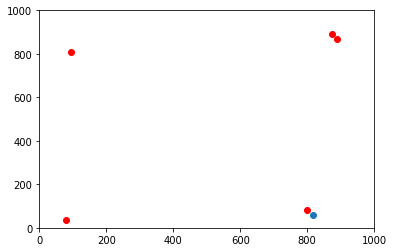

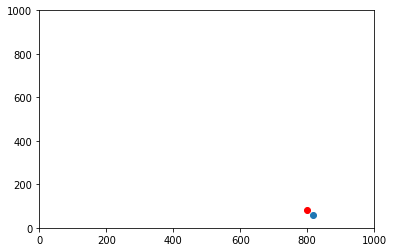

In [8]:
# Gerando cinco centroides
centroides = gerarCentroidesAleatorios(x, 5)

# Gerando um ponto aleatorio para verificar a proximidade
ponto = x[x.shape[0] - 1]

# Descobrindo qual é o cluster correto
clusterCorreto = definirCluster(ponto, centroides)

# Plotando o ponto e os centroides
plt.scatter(centroides[:,0], centroides[:, 1], c="red")
plt.scatter(ponto[0], ponto[1])
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.show()

# Plotando apenas o ponto e o cluster correto
plt.scatter(centroides[clusterCorreto][0], centroides[clusterCorreto][1], c="red")
plt.scatter(ponto[0], ponto[1])
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.show()

## Função gerarY

Essa função gera o vetor <b>y</b> que será o retorno da função principal do KMeans. Ao chamarmos a função KMeans, deveremos mandar os dados e a quantidade de clusters desejada. Para cada <b>x</b> essa função irá dizer a qual ponto o dado pertence.

In [9]:
def gerarY(data, centroides):
    y = []    
        
    # Verificando para cada ponto, qual é o seu cluster
    for ponto in data:
        y.append(definirCluster(ponto, centroides))
        
    y = numpy.array(y)
    
    return y

### Testando a função

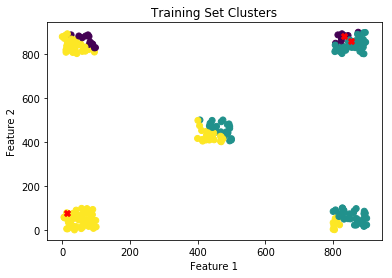

In [10]:
# Gerando clusters e verificando se os dados são pintados de forma correta
# Os centroides são aleatórios, logo, é claro que não será a melhor clusterização
centroides = gerarCentroidesAleatorios(x, 3)
y = gerarY(x, centroides)
printarComCentroides(x, y, centroides)

## Função definirCentroidePorPontos

Essa função recebe todos os pontos de um determinado cluster e calcula qual deve ser o centróide desse cluster. Essa função será útil pois, a cada iteração do KMeans é estabelecido um cluster para cada ponto e, depois disso, é necessário recalcular os centroides de cada cluster.

In [11]:
def definirCentroidePorPontos(pontos):
    
    qtdDimensoes = pontos.shape[1]
    
    centroCadaDimensao = []
    
    # É só criar um vetor em que cada dimensão é a média de cada dimensão dos pontos
    for dimensao in range(0, qtdDimensoes):
        centroCadaDimensao.append(numpy.mean(pontos[:,dimensao]))
        
    return numpy.array(centroCadaDimensao)

## Função recalcularCentroides

Essa função usa a função anterior para recalcular os centroides de todos os clusters. Lembrando que a função acima só recalcula os centroides de um único cluster por vez.

In [12]:
def recalcularCentroides(x, y, qtdClusters):

    # Criando o vetor de centroides novos
    centroidesNovos = []
    
    # Para cada cluster irei recalcular seu centróide
    for clusterAtual in range(0, qtdClusters):
        
        # Preciso saber quais pontos pertencem ao cluster atual
        pontosDoClusterAtual = []
        for index, clusterY in enumerate(y):
            if clusterY == clusterAtual:
                pontosDoClusterAtual.append(x[index])
        
        # Transformando em um array numpy
        pontosDoClusterAtual = numpy.array(pontosDoClusterAtual)
        
        # Se o centroide atual não tem nenhum ponto, então tem algo de errado
        if pontosDoClusterAtual.size == 0:
            return numpy.array([-1])
        
        # Recalculando o centroide do cluster atual de acordo com os pontos que acabamos de achar
        centroidesNovos.append(definirCentroidePorPontos(pontosDoClusterAtual))
            
    # Retornando os novos centroides no formato array numpy
    centroidesNovos = numpy.array(centroidesNovos)
    
    return centroidesNovos    

### Testando as funções

Antes de recalcular os centróides


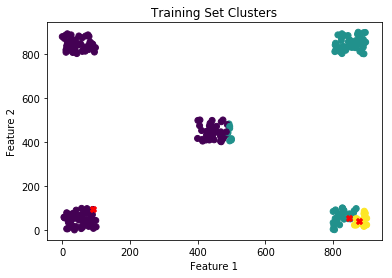

Depois de recalcular os centróides


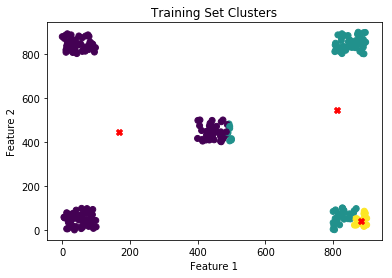

In [13]:
# Irei criar três centroides, plotar os dados e depois recalcular os centroides
k = 3

centroides = gerarCentroidesAleatorios(x, k)
y = gerarY(x, centroides)
print("Antes de recalcular os centróides")
printarComCentroides(x, y, centroides)

# Recalculando os centroides
centroides = recalcularCentroides(x, y, k)
print("Depois de recalcular os centróides")
printarComCentroides(x, y, centroides)

## Função kMeans

Essa é a função que realiza uma única rodada do KMeans. Ela gera os centróides originais e realiza todas as iterações até que os centroides não se modifiquem mais, indicando o fim do algoritmo. Ela retorna os centroides e o vetor y que contém o cluster a qual cada ponto pertence.

In [14]:
def kMeans(data, kClusters):
    
    #gerando os centroides iniciais aleatórios
    centroidesAnteriores = gerarCentroidesAleatorios(data, kClusters)
    
    #gerando o "target"
    y = gerarY(data, centroidesAnteriores)
        
    #recalculando os centroides até que sejam iguais
    continuar = True
    
    # Enquanto os centroides anteriores não forem iguais aos centroides novos...
    while continuar:
        
        # Recalculando os centroides (o while é pra evitar aquele erro na função recalcularCentroides)
        centroidesNovos = recalcularCentroides(data, y, kClusters)
        while numpy.array_equal(centroidesNovos, numpy.array([-1])):
            centroidesNovos = recalcularCentroides(data, y, kClusters)
        
        # Depois de ter os novos centroides, devo verificar a qual cluster cada dado pertence
        y = gerarY(data, centroidesNovos)
        
        # Se os centroides novos forem iguais aos centroides antigos, então o algoritmo acabou
        if numpy.array_equal(centroidesNovos, centroidesAnteriores):
            continuar = False
        
        # Senão, falo que os centroides antigos são os centroides novos para começar uma nova iteração
        else:
            centroidesAnteriores = centroidesNovos
            
    # Ao final, devo retornar os centroides e o vetor target
    return centroidesNovos, y

### Testando a função

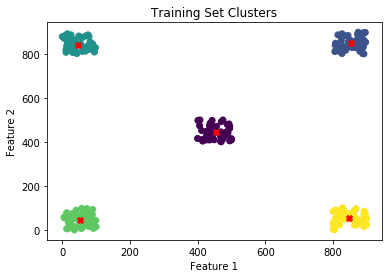

In [15]:
k = 5
centroidesFinais, y = kMeans(x, k)
printarComCentroides(x, y, centroidesFinais)

## Função WBIndex

O algoritmo KMeans pode produzir clusterizações diferentes de acordo com os centroides iniciais. Por isso, é necessário rodar a função kMeans um certo número de vezes para que se saiba qual iteração produziu o melhor resultado, e, assim, retornar a melhor clusterização encontrada.

Em cada iteração do kMeans, deve-se obter uma métrica que indique quão boa foi a clusterização. Através dessa métrica é que saberemos qual iteração produziu o mlehor resultado.

Em geral, no KMeans, usa-se a inércia como métrica, mas também é possível utilizar outras que ainda não foram implementadas no Sklearn. O WB Index é uma dessas métricas.

In [16]:
def WBIndex(x, y, centroides):
    ssw = sumSquaresWithin(x, y, centroides)
    ssb = sumSquaresBetween(x, y, centroides)
    return  (len(x) * (ssw/ssb))

def sumSquaresWithin(x, y, centroides):
    
    distanciasAoQuadrado = []
    
    #Primeiro passando de cluster em cluster
    for clusterAtual in range(0, len(centroides)):
        
        #Pra cada cluster eu pego todos os pontos dele
        for index, clusterPontoAtual in enumerate(y):
            if clusterAtual == clusterPontoAtual:
                #Se chegou aqui então eu estou em um ponto do cluster atual
                d = x[index] - centroides[clusterAtual]
                distanciasAoQuadrado.append(d * d)
    
    #Aqui já tenho o vetor distanciasAoQuadrado completo com todos os 
    #pontos em relação aos seus centroides, é só retornar a soma de tudo isso
    distanciasAoQuadrado = numpy.array(distanciasAoQuadrado)    
    
    return numpy.sum(distanciasAoQuadrado)

def sumSquaresBetween(x, y, centroides):
    
    #Primeiro, tenho que achar o X médio de TODOS os pontos 
    #(embaixo da equação 3.9 (pág 24) tem uma representação visual desse x médio)
    xMedio = []
    for dimensaoAtual in range(0, x.shape[1]):
        xMedio.append(numpy.mean(x[:, dimensaoAtual]))
    xMedio = numpy.array(xMedio)
    
    #Beleza, agr já tenho o xMedio, é só aplicar a equação 3.8 e somar tudo como mostra a equação 3.9
    bs = []
    
    for clusterAtual in range(0, len(centroides)):
        #Preciso saber a quantidade de pontos que existem no cluster atual
        qtdPontosClusterAtual = 0
        for clusterPontoAtual in y:
            if clusterPontoAtual == clusterAtual:
                qtdPontosClusterAtual += 1
        
        #agora aplico a equação 3.8...
        d = centroides[clusterAtual] - xMedio
        bs.append(qtdPontosClusterAtual * (d * d))
        
    #...e somo todos os B's como mostra a equação 3.9
    bs = numpy.array(bs)
    
    return numpy.sum(bs)

## Função main

Finalmente chegamos à função principal. Ela deve receber o número de iterações do KMeans desejado, o número de clusters e os dados que se deseja clusterizar.

Para cada iteração, ela guarda o resultado <b>y</b> e o <b>WBIndex</b>. Ao final, é só verificar qual iteração produziu o menor WB Index e retornar os resultados dessa iteração.

In [17]:
def main(data, kClusters=3, nRepeticoes=25, printarIteracoes=False):
    
    # Vetores que armazenarão os resultados de cada iteração
    wbs = []
    ys = []
    
    #para cada repetição vou receber o y da função kMeans e calcular o WBIndex
    for i in range(0, nRepeticoes):        
        centroides, y = kMeans(data, kClusters)
        wbs.append(WBIndex(data, y, centroides))
        ys.append(y)
        
        if printarIteracoes:
            print("Iteração:", i + 1)
            print("WB Index:", wbs[i])
            printarComCentroides(data, y, centroides)
            print("\n")
        
    indexMenorWB = 0
    
    # Verificando qual iteração do algoritmo produziu os melhores resultados
    for index, wbAtual in enumerate(wbs):
        if wbAtual < wbs[indexMenorWB]:
            indexMenorWB = index
            
    if printarIteracoes:
        print("Iteração que produziu o melhor resultado:", indexMenorWB + 1)
        print("Melhor WB Index:", wbs[indexMenorWB])
        print("\n")    
    
    # y recebe o melhor resultado das iterações
    y = numpy.array(ys[indexMenorWB])
    
    # Também é preciso retornar os centroides da melhor iteração
    centroides = recalcularCentroides(data, y, kClusters)
    
    # Retornando o melhor resultado
    return centroides, y

## Testando toda implementação

Iteração: 1
WB Index: 38.037807102811286


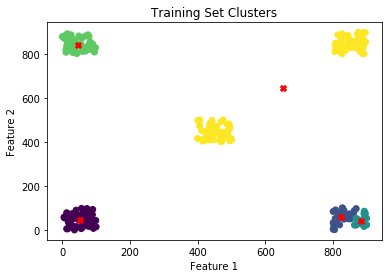



Iteração: 2
WB Index: 84.02529362456237


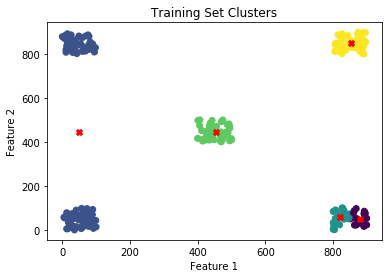



Iteração: 3
WB Index: 126.67244545714686


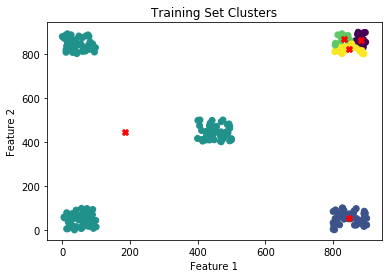



Iteração: 4
WB Index: 36.073219948382565


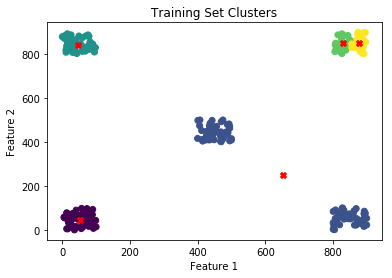



Iteração: 5
WB Index: 84.02529362456237


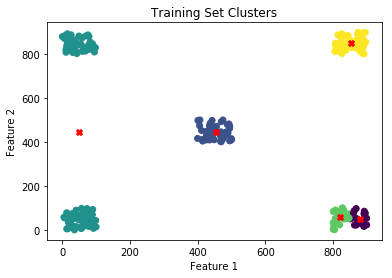



Iteração: 6
WB Index: 36.062370074917894


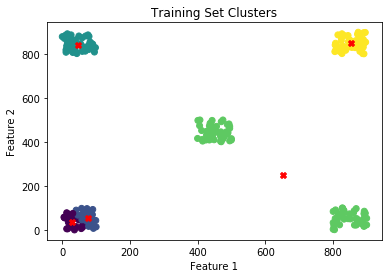



Iteração: 7
WB Index: 84.66604118429969


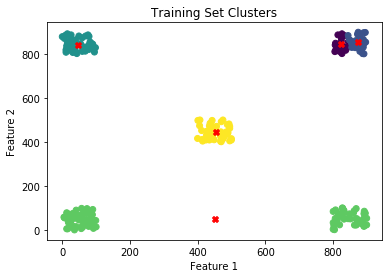



Iteração: 8
WB Index: 37.26976107548084


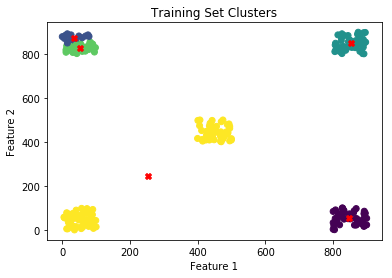



Iteração: 9
WB Index: 36.093632399761994


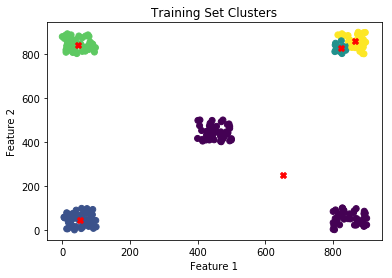



Iteração: 10
WB Index: 37.248108914352024


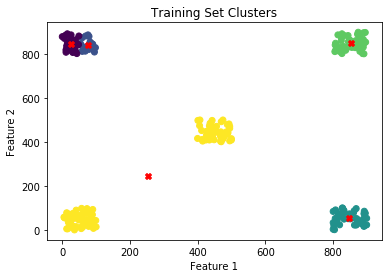



Iteração: 11
WB Index: 125.84311423853173


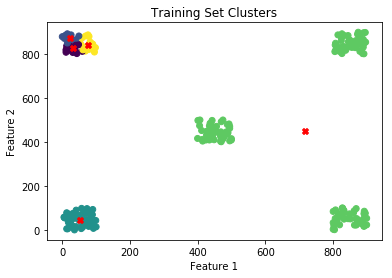



Iteração: 12
WB Index: 38.11215099141632


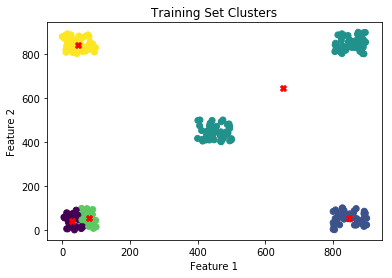



Iteração: 13
WB Index: 1.570373267819401


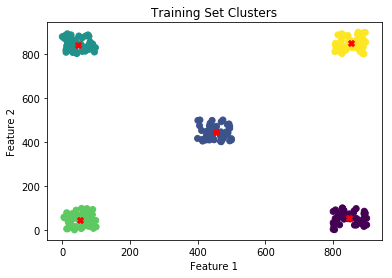



Iteração: 14
WB Index: 36.100383002923444


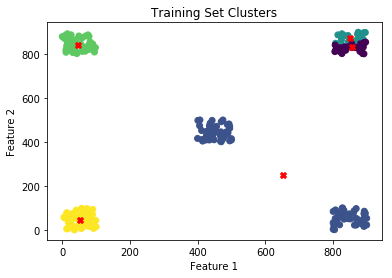



Iteração: 15
WB Index: 38.03191955011123


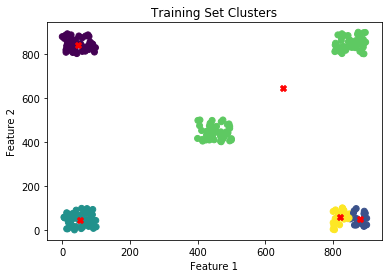



Iteração: 16
WB Index: 1.5703732678194011


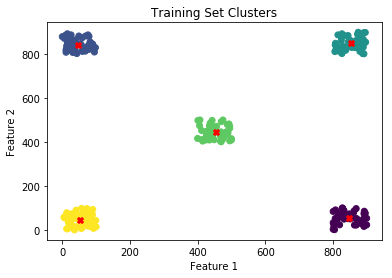



Iteração: 17
WB Index: 38.13976289898693


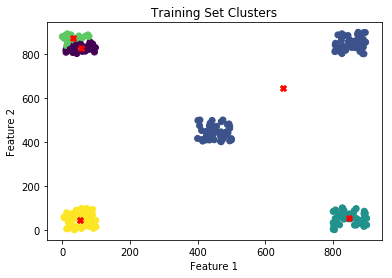



Iteração: 18
WB Index: 37.24810891435203


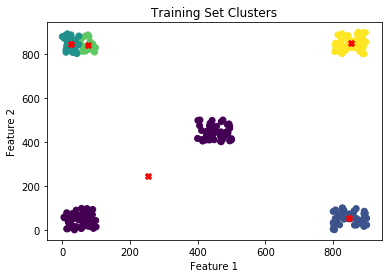



Iteração: 19
WB Index: 37.90699503981782


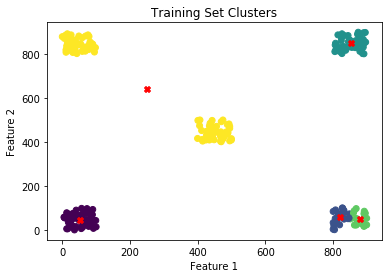



Iteração: 20
WB Index: 36.08430218859168


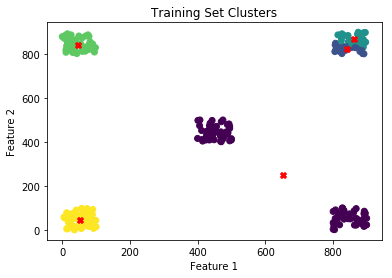



Iteração: 21
WB Index: 1.5703732678194011


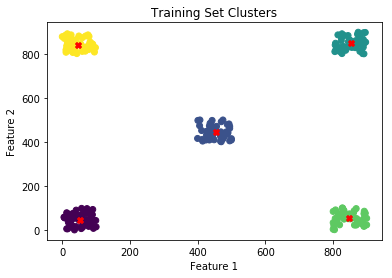



Iteração: 22
WB Index: 38.03191955011124


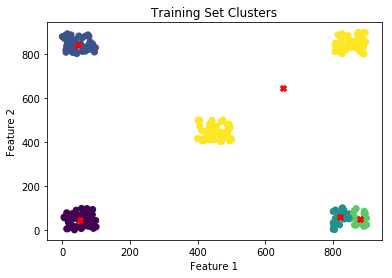



Iteração: 23
WB Index: 36.06237007491791


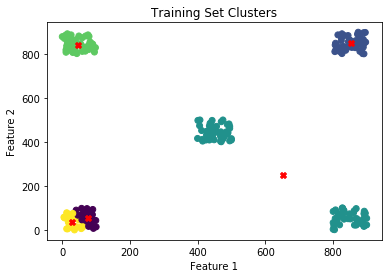



Iteração: 24
WB Index: 1.5703732678194011


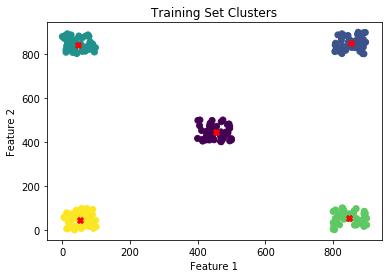



Iteração: 25
WB Index: 1.5703732678194011


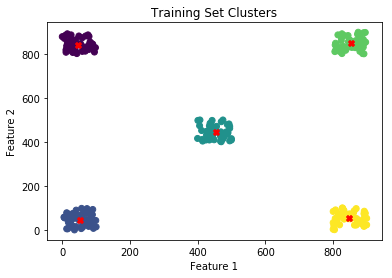



Iteração que produziu o melhor resultado: 13
Melhor WB Index: 1.570373267819401




In [18]:
centroides, y = main(x, kClusters=5, printarIteracoes=True)

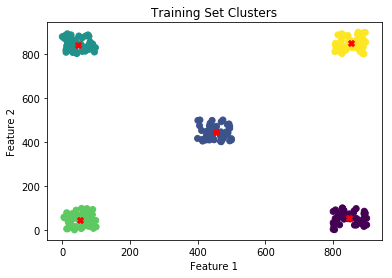

In [19]:
printarComCentroides(x, y, centroides)

In [20]:
x = []

for i in range(0, 500):
    x.append([randint(0, 100), randint(0, 100)])

x = numpy.array(x)

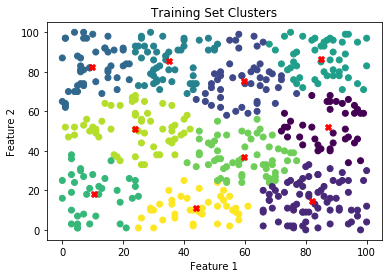

In [ ]:
for a in range(0, 10):
    centroides, y = main(x, kClusters=10)
    printarComCentroides(x, y, centroides)